<a href="https://colab.research.google.com/github/jdasam/mas1004-2023/blob/main/live_coding/4_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST classification
- In this notebook we will use the MNIST dataset to train a neural network to classify handwritten digits.

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
# make plt grayscale as default
plt.rcParams['image.cmap'] = 'gray'

DEV = 'cuda' # Use GPU # library for NVIDIA GPU
assert torch.cuda.is_available(), "Make sure you run this Colab in GPU"

## 0. Download Dataset

In [2]:
train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor(), download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 120424138.42it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 110525268.09it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27954403.20it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19823651.16it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# See how our data looks like
# you can get the i-th data from the dataset class using dataset[i]
train_data[0] # this will return (image tensor, label)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [4]:
# img, label = train_data[0] # A datasample is a pair of image and label
img = train_data[0][0]
label = train_data[0][1]

In [5]:
print(img.shape)
img

torch.Size([1, 28, 28])


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [6]:
# you can delete axis that has only one item by squeeze
img = img.squeeze() # or img = img[0] or img = img[0, :, : ]
print(img.shape)
img

torch.Size([28, 28])


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [7]:
len(train_data) # number of samples in the dataset

60000

Label is 8


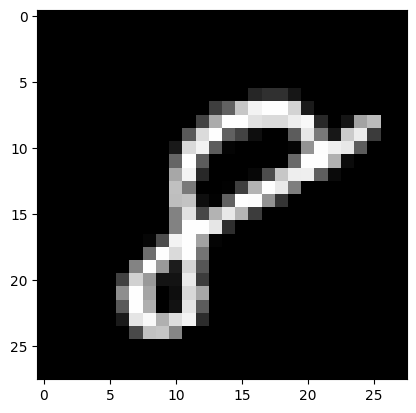

In [8]:
data_idx = 59999
# You can load the data sample from the dataset, using [idx]
img, label = train_data[data_idx] # get the data_idx-th sample from the train_data
img = img.squeeze()

plt.imshow(img), # plt.imshow visualize 2D image
print(f'Label is {label}') # f means formatted string

In [9]:
# how many data exists in our train_data?
len(train_data)

60000

In [10]:
img.shape

torch.Size([28, 28])

In [11]:
# We have to convert a tensor of 28, 28 to a tensor of 784
flattened_img = img.reshape(784)
flattened_img.shape
# we can reshape a tensor to have a specific shape

# -1 automatically decide the size of that dimension
print(flattened_img.numel())
flattened_img = img.reshape(-1)
flattened_img.shape

784


torch.Size([784])

In [12]:
# reshape (-1) examples
test_img = img.reshape(4, 7, -1)

In [13]:
# reshape is a function that converts a shape of tensor into specific shape


In [87]:
# let's collect 1000 data from train_data

imgs = []
labels = []

for i in range(60000):
  data_sample = train_data[i]
  img, label = data_sample
  imgs.append(img)
  labels.append(label)

# labels
label_tensor = torch.tensor(labels)
print(label_tensor.shape)
label_tensor[:10]


torch.Size([60000])


tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [15]:
# imgs is a list of tensor
type(imgs), type(imgs[0])
# we want to convert a list of tensor to a single tensor

(list, torch.Tensor)

In [16]:
# two ways to convert a list of tensor to a single tensor
# torch.cat() concatenates a list of tensor to an existing dim
# torch.stack() concatenates a list of tensor to a new dim
torch.cat(imgs).shape, torch.stack(imgs).shape

(torch.Size([1000, 28, 28]), torch.Size([1000, 1, 28, 28]))

In [88]:
out = torch.stack(imgs)
out.shape

torch.Size([60000, 1, 28, 28])

In [18]:
(out[100] == imgs[100]).all()

tensor(True)

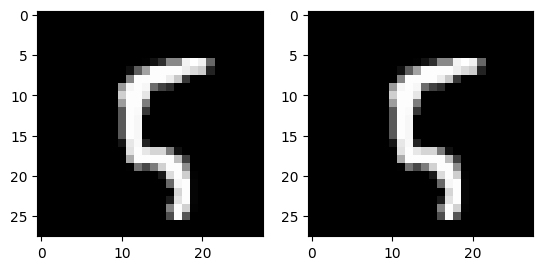

In [19]:
plt.subplot(1, 2, 1) # use 1 row, 2 column, and use 1st place
plt.imshow(out[100].squeeze())
plt.subplot(1,2,2)
plt.imshow(imgs[100].squeeze())

In [89]:
# flatten that out tensor so that each datasample has 784 numbers

# data_tensor = out.reshape(1000, 784)
data_tensor = out.reshape(-1, 784)
data_tensor.shape



torch.Size([60000, 784])

#### Extra: Practice on Reshape

In [21]:
# what is difference between reshape(1000, 784) and reshape(784, 1000)
test = torch.arange(784).repeat(1000, 1)
test, test.shape

(tensor([[  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         ...,
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783]]),
 torch.Size([1000, 784]))

In [22]:
test_flattened = test.reshape(-1) # 784000 dim vector
test_flattened.shape

torch.Size([784000])

In [23]:
reshaped_a = test_flattened.reshape(1000, 784)
reshaped_b = test_flattened.reshape(784, 1000)
reshaped_a, reshaped_b

(tensor([[  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         ...,
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783]]),
 tensor([[  0,   1,   2,  ..., 213, 214, 215],
         [216, 217, 218,  ..., 429, 430, 431],
         [432, 433, 434,  ..., 645, 646, 647],
         ...,
         [136, 137, 138,  ..., 349, 350, 351],
         [352, 353, 354,  ..., 565, 566, 567],
         [568, 569, 570,  ..., 781, 782, 783]]))

In [24]:
dummy = torch.arange(12)
print(dummy)
print(dummy.reshape(3,4))
print(dummy.reshape(4,3))

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


In [25]:
# label_tensor = torch.tensor(label_list)
# flattened_data.shape, label_tensor.shape

NameError: ignored

In [ ]:
# first_data = flattened_data[1]
# plt.imshow(first_data.reshape(28, 28))

In [ ]:
# first_data.shape, first_data

## 1. Make a Model

In [28]:
class Classifier(nn.Module):
  def __init__(self, input_dim=784, num_class=10):
    super().__init__()
    # Let's make three layer models

    # What we know: input_dim = 784
    # number_of_categories = 10
    hidden_dim = 64
    hidden_dim2 = 32

    self.layer1 = nn.Linear(input_dim, hidden_dim)
    self.layer2 = nn.Linear(hidden_dim, hidden_dim2)
    self.layer3 = nn.Linear(hidden_dim2, num_class)
    # self.layer = nn.Linear(784, 123)

  def forward(self, x): # x is an input
    # x is a tensor with a shape of [Num samples, 784]

    # we want to predict the probability of each category label for a given input
    # we have 10 different categories in our dataset

    x = self.layer1(x)
    x = x.relu()
    x = self.layer2(x)
    x = x.relu()
    logit = self.layer3(x)
    prob = logit.softmax(dim=-1)
    return prob, logit


model = Classifier()
data_tensor.shape

torch.set_printoptions(sci_mode=False)
pred, logit = model(data_tensor)
pred.shape, pred[:10]

(torch.Size([1000, 10]),
 tensor([[0.0872, 0.0885, 0.1299, 0.1091, 0.0947, 0.0903, 0.0865, 0.0871, 0.0969,
          0.1298],
         [0.0883, 0.0843, 0.1348, 0.1104, 0.0929, 0.0858, 0.0890, 0.0905, 0.0952,
          0.1288],
         [0.0904, 0.0867, 0.1272, 0.1105, 0.0956, 0.0848, 0.0890, 0.0918, 0.0937,
          0.1303],
         [0.0895, 0.0866, 0.1290, 0.1167, 0.0935, 0.0893, 0.0878, 0.0889, 0.0940,
          0.1246],
         [0.0900, 0.0874, 0.1309, 0.1156, 0.0924, 0.0891, 0.0899, 0.0892, 0.0934,
          0.1221],
         [0.0917, 0.0856, 0.1292, 0.1148, 0.0948, 0.0847, 0.0912, 0.0886, 0.0938,
          0.1256],
         [0.0880, 0.0930, 0.1266, 0.1136, 0.0949, 0.0900, 0.0861, 0.0893, 0.0953,
          0.1233],
         [0.0864, 0.0875, 0.1326, 0.1131, 0.0953, 0.0867, 0.0871, 0.0871, 0.0937,
          0.1304],
         [0.0897, 0.0902, 0.1271, 0.1132, 0.0951, 0.0891, 0.0865, 0.0914, 0.0957,
          0.1220],
         [0.0861, 0.0887, 0.1312, 0.1115, 0.0949, 0.0913, 0.0917, 

In [36]:
print(logit[0], pred[0])
edited_logit1 = logit[0].clone()
edited_logit1[0] = 5.0
print(edited_logit1)
print(edited_logit1.softmax(dim=-1))
edited_logit2 = logit[0].clone()
edited_logit2[1:] = -5
print(edited_logit2)
print(edited_logit2.softmax(dim=-1))


tensor([-0.1781, -0.1639,  0.2204,  0.0454, -0.0955, -0.1440, -0.1863, -0.1799,
        -0.0735,  0.2191], grad_fn=<SelectBackward0>) tensor([0.0872, 0.0885, 0.1299, 0.1091, 0.0947, 0.0903, 0.0865, 0.0871, 0.0969,
        0.1298], grad_fn=<SelectBackward0>)
tensor([ 5.0000, -0.1639,  0.2204,  0.0454, -0.0955, -0.1440, -0.1863, -0.1799,
        -0.0735,  0.2191], grad_fn=<CopySlices>)
tensor([0.9443, 0.0054, 0.0079, 0.0067, 0.0058, 0.0055, 0.0053, 0.0053, 0.0059,
        0.0079], grad_fn=<SoftmaxBackward0>)
tensor([-0.1781, -5.0000, -5.0000, -5.0000, -5.0000, -5.0000, -5.0000, -5.0000,
        -5.0000, -5.0000], grad_fn=<CopySlices>)
tensor([0.9324, 0.0075, 0.0075, 0.0075, 0.0075, 0.0075, 0.0075, 0.0075, 0.0075,
        0.0075], grad_fn=<SoftmaxBackward0>)


In [ ]:
# We want to convert the output into a range of probability
# Why we use softmax function

## 1.1 Make Softmax

In [ ]:
torch.set_printoptions(sci_mode=False)
def my_softmax(x, dim=0):
  exp_x = torch.exp(x)
  return exp_x / torch.sum(exp_x, dim=1, keepdim=True)
my_softmax(pred, dim=1)

In [ ]:
pred.softmax(dim=1)

In [ ]:
test = pred[:3]
print(test)
print(torch.exp(test))
print(torch.exp(test).sum(dim=1, keepdim=True))

## 2. Training

### 2.1 Make a Loss Function
- Define Negative Log Likelihood Loss
  - $L = -\sum_{i=1}^n\log(\hat{y}_{i}^{(c)})$
  - $y_{i}^{(c)} \in (0, 1)$: predicted probability for $i$-th sample to be class $c$, where $c$ is the ground truth label for $i$-th sample
- Define Cross Entropy Loss
  - $L = -\sum_{i=1}^ny_{i}\log(\hat{y}_{i})$
  - $ y_{i} \in (0,1)^C$: ground truth label for $i$-th sample to be class $c$. $C$ denotes the number of classes.
    - One-hot encoding: $y_{i} = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]$
  - $ \hat{y}_{i} \in (0, 1)^C$: predicted probability for $i$-th sample to be class $c$
    - e.g.: $\hat{y}_{i} = [0.1, 0.1, 0.5, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1]$

In [64]:
def get_negative_log_likelihood(pred, target, eps=1e-8):
  predicted_probs = []
  # for i in range(len(pred)): #len(pred) means number of samples, or pred.shape[0]
  #   i_th_pred = pred[i]
  #   correct_label = target[i]
  #   predicted_prob_for_correct_class = i_th_pred[correct_label]
  #   # print(i_th_pred, correct_label, predicted_prob_for_correct_class)
  #   predicted_probs.append(predicted_prob_for_correct_class)

  # predicted_probs = torch.tensor(predicted_probs)
  predicted_probs = pred[torch.arange(len(target)), target]
  return -torch.log(predicted_probs + eps).mean()

def get_cross_entropy(pred, target, eps=1e-8):
  return

def make_one_hot_vector(target, num_class=10):
  return

# pred.shape, label_tensor.shape
# print(pred[:5])
# print(label_tensor[:5])

# predicted_probs = []
# for i in range(len(pred)): #len(pred) means number of samples, or pred.shape[0]
#   i_th_pred = pred[i]
#   correct_label = label_tensor[i]
#   predicted_prob_for_correct_class = i_th_pred[correct_label]
#   # print(i_th_pred, correct_label, predicted_prob_for_correct_class)
#   predicted_probs.append(predicted_prob_for_correct_class)

# predicted_probs = torch.tensor(predicted_probs)

loss = get_negative_log_likelihood(pred, label_tensor)
loss

tensor(2.3195, grad_fn=<NegBackward0>)

In [ ]:
# you can index tensor by list of indices
# [(0, target[0]), (1, target[1]), (2, target[2])]
# for i, c in zip(torch.arange(len(label_tensor)), label_tensor):
#   print(i,c)

pred[torch.arange(len(label_tensor)), label_tensor]

In [57]:
-torch.log(predicted_probs).mean()

tensor(2.3195)

### 2.2 Define Training Loop

In [74]:
def train_one_step(model, optimizer, loss_function, input, target):
  pred, logit = model(input) # forward pass. compute the prediction
  loss = loss_function(pred, target) # compute the loss
  loss.backward() # backpropagate theloss. compute the gradient
  optimizer.step() # update the parameters based on each gradient
  optimizer.zero_grad() # clear the gradient for every parameters
  return loss.item() # return the loss value


### 2.3 Make Batch

In [70]:
def get_batch(input_tensor, label_tensor, batch_size, start_idx):
  # slice input tensor from start_idx:start_idx + batch_size

  return input_tensor[start_idx:start_idx+batch_size], label_tensor[start_idx:start_idx+batch_size]

batch_size = 64
start_idx = 10
batch_input, batch_label = get_batch(data_tensor, label_tensor, batch_size, start_idx)
(batch_input[0] == data_tensor[10]).all()

tensor(True)

### 2.4 Train

In [102]:
import time
model = Classifier()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_function = get_negative_log_likelihood

losses = []
num_epochs = 20
batch_size = 10000
num_batch_per_epoch = len(data_tensor) // batch_size # TODO
# num_batch_per_epoch

for epoch in range(num_epochs):
  # rand_idx = torch.randperm(len(data_tensor))
  # data_tensor = data_tensor[rand_idx]
  # label_tensor = label_tensor[rand_idx]
  start_time = time.time()
  for batch_idx in range(num_batch_per_epoch):
    batch_start_idx = batch_idx * batch_size
    input_batch, target_batch = get_batch(data_tensor, label_tensor, batch_size, batch_start_idx)
    loss = train_one_step(model, optimizer, loss_function, input_batch, target_batch)
    losses.append(loss)
  end_time = time.time()
  print(end_time - start_time)

0.4289402961730957
0.3039095401763916
0.2572927474975586
0.2698850631713867
0.2571401596069336
0.25853419303894043
0.2511758804321289
0.26044178009033203
0.255511999130249
0.2550232410430908
0.25792717933654785
0.2553579807281494
0.25525498390197754
0.2536506652832031
0.25015783309936523
0.25363636016845703
0.24899053573608398
0.2510344982147217
0.24818634986877441
0.25214338302612305


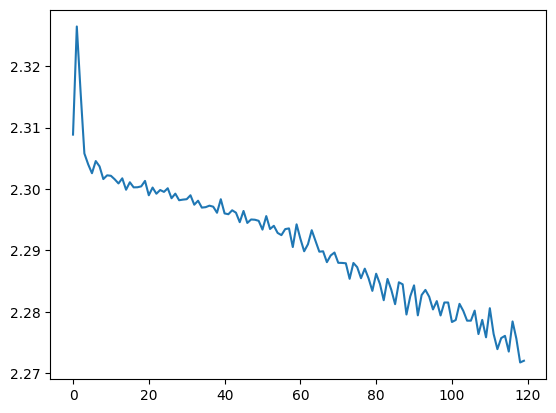

In [103]:
plt.plot(losses)